# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [8]:
# Your code here
# A1: The car is behind door 1.
# A2: The car is behind door 2.
# A3: The car is behind door 3.
# B: The event that Monty opens a door showing a goat.

# Probability of the player opening any of the doors
p_A1 = p_A2 = p_A3 = 1/3

# The probability of event B happening depends on either of the other event happening(A1, A2, A3)
# If the player chooses A1
p_B_given_A1 = 1/2 # Monty can open either A2 or A3.
p_B_given_A2 = 0 # Monty cannot open A2 if the car is behind it.
p_B_given_A3 = 1 # Monty has only A2 to open as the car is behind A3 and the player has chosen A1

p_B = (p_B_given_A1 * p_A1) + (p_B_given_A2 * p_A2) + (p_B_given_A3 * p_A3)
p_B

# The probability after Monty opens a door to show a goat:
p_A1_given_B = (p_B_given_A1 * p_A1) / p_B
p_A2_given_B = (p_B_given_A2 * p_A2) / p_B
p_A3_given_B = (p_B_given_A3 * p_A3) / p_B
print(p_A1_given_B, p_A2_given_B, p_A3_given_B)
# As we can see it clearly the probability of wining increases(doubles) if the player switches to a different door.


0.3333333333333333 0.0 0.6666666666666666


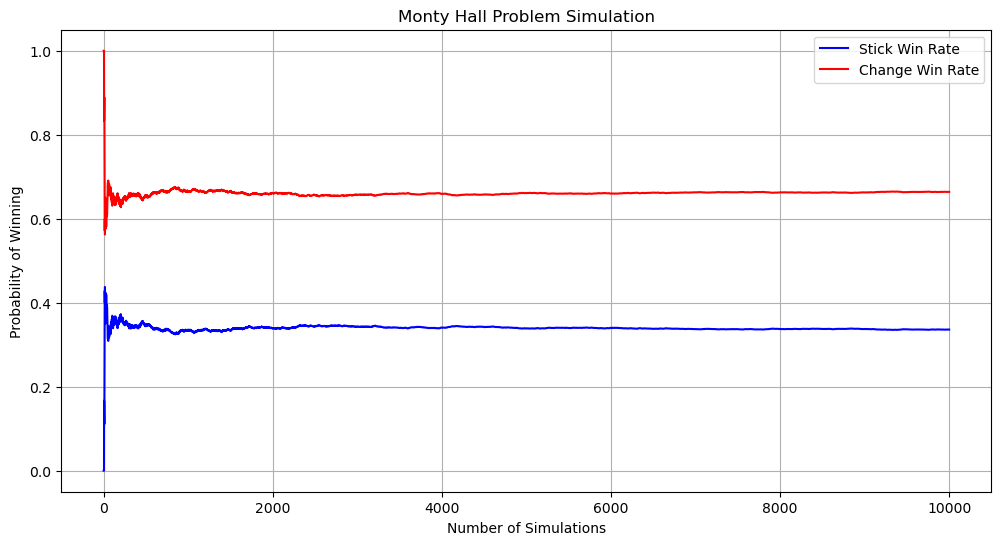

In [7]:
# --- Simulation ---

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def simulate_monty_hall(num_simulations):
    stick_wins = 0
    change_wins = 0
    stick_win_rates = []
    change_win_rates = []

    for i in range(1, num_simulations + 1):
        # Randomly place the car behind one of the three doors
        door_with_car = np.random.randint(1, 4)
        
        # Contestant randomly chooses one of the three doors
        player_choice = np.random.randint(1, 4)
        
        # Monty opens a door with a goat (not the chosen door and not the car door)
        monty_options = [door for door in range(1, 4) if door != player_choice and door != door_with_car]
        monty_choice = np.random.choice(monty_options)
        
        # Determine the other door (the one not chosen by the contestant and not opened by Monty)
        remaining_door = next(door for door in range(1, 4) if door != player_choice and door != monty_choice)
        
        # Check if staying or switching would win
        if player_choice == door_with_car:
            stick_wins += 1
        elif remaining_door == door_with_car:
            change_wins += 1
        
        stick_win_rate = stick_wins / i
        change_win_rate = change_wins / i

        stick_win_rates.append(stick_win_rate)
        change_win_rates.append(change_win_rate)
    
    return stick_win_rates, change_win_rates

# Run the simulation for a large number of trials
num_simulations = 10000
stick_win_rates, change_win_rates = simulate_monty_hall(num_simulations)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_simulations + 1), stick_win_rates, label='Stick Win Rate', color='blue')
plt.plot(range(1, num_simulations + 1), change_win_rates, label='Change Win Rate', color='red')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.title('Monty Hall Problem Simulation')
plt.legend()
plt.grid(True)
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 